## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

from scipy.stats import ttest_ind
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

C:\Users\SVF\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the dataset

In [2]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching supplier summary data
df = pd.read_sql_query('SELECT * FROM sales_summary', conn)
df.sample(3)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
5492,480,BACARDI USA INC,4252,Bacardi Limon Rum,0.77,0.99,50.0,4290,3303.30,9958.0,9858.42,3051.18,516.74,89286.27,6555.12,66.492602,2.321212,2.984416
3159,9815,WINE GROUP INC,23889,Corbett Canyon Wh Znfdl,4.82,7.99,1500.0,3141,15139.62,3154.0,25625.46,15337.14,704.37,27100.41,10485.84,40.919617,1.004139,1.692609
7856,90011,FORTUNE WINE BROKERS LLC,16955,Mapuche Svgn Blanc,7.09,11.99,750.0,72,510.48,72.0,833.28,103.91,8.09,238.61,322.80,38.738479,1.000000,1.632346


## Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understanding the data patterns, identify anomalies, and ensure data quality before proceeding with further analysis. 

In [3]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


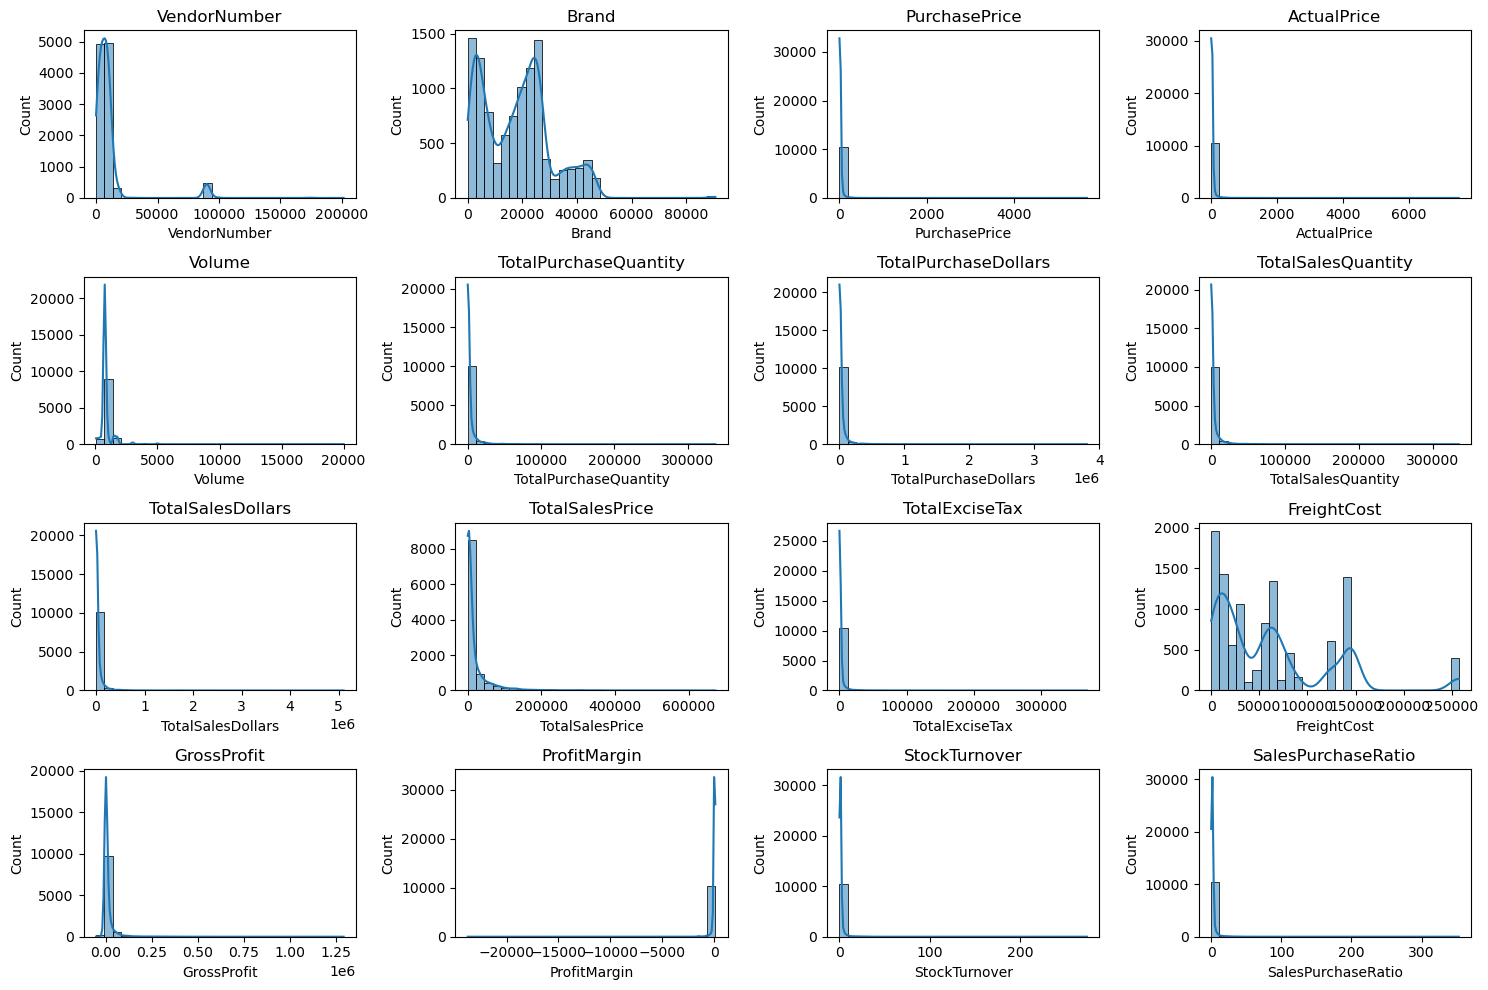

In [4]:
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


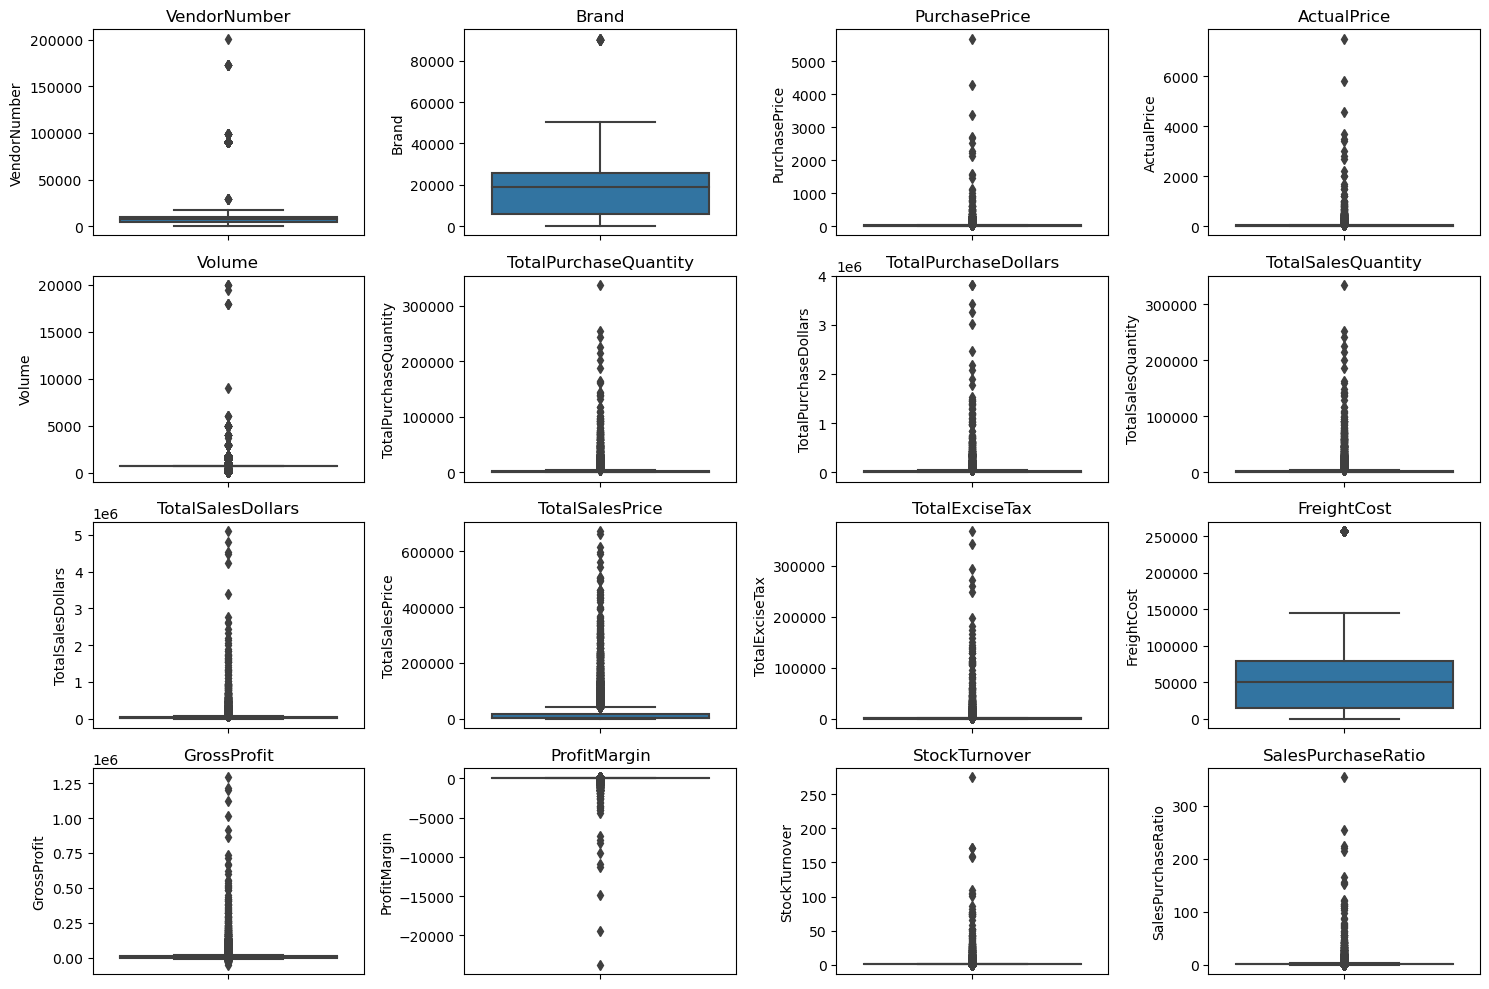

In [5]:
# Outlier detection with box plot
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


## Summary Statistics Insights:

### Negative & Zero Values:

- **Gross Profit**: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

- **Profit Margin**: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

- **Total Sales Quantity & Sales Dollars**: Minimum values are 0, meaning some products where purchased but never sold. These could be slow-moving or obsolete stock.


### Outliers Indicated By High Standard Deviations:

- **Purchase & Actual Prices**: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

- **Freight Cost**: Huge variation, from 0.09 to 2,57,032.07, suggests logistic insufficincies or bulk shipments.

- **Stock Turnover**: Ranges from 0 to 274.5, implying some products sell extremely fast while other remain in stock indefinitely. Value more than 1 indicating that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [6]:
# Filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * FROM sales_summary
                        WHERE GrossProfit > 0
                        AND ProfitMargin > 0
                        AND TotalSalesQuantity > 0""", conn)

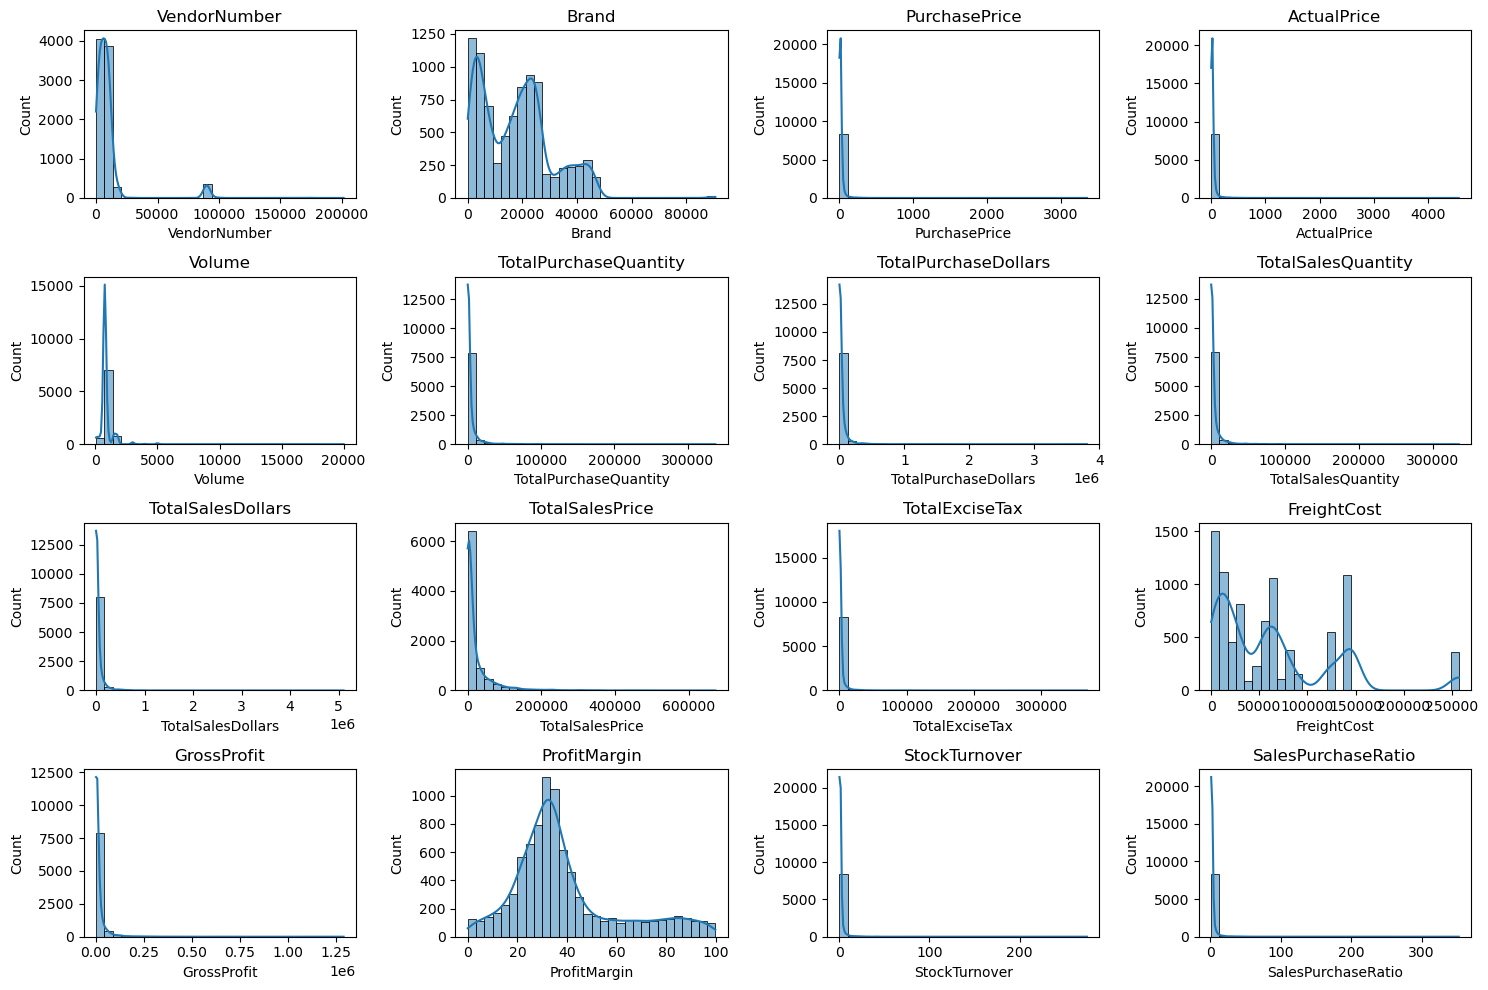

In [7]:
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

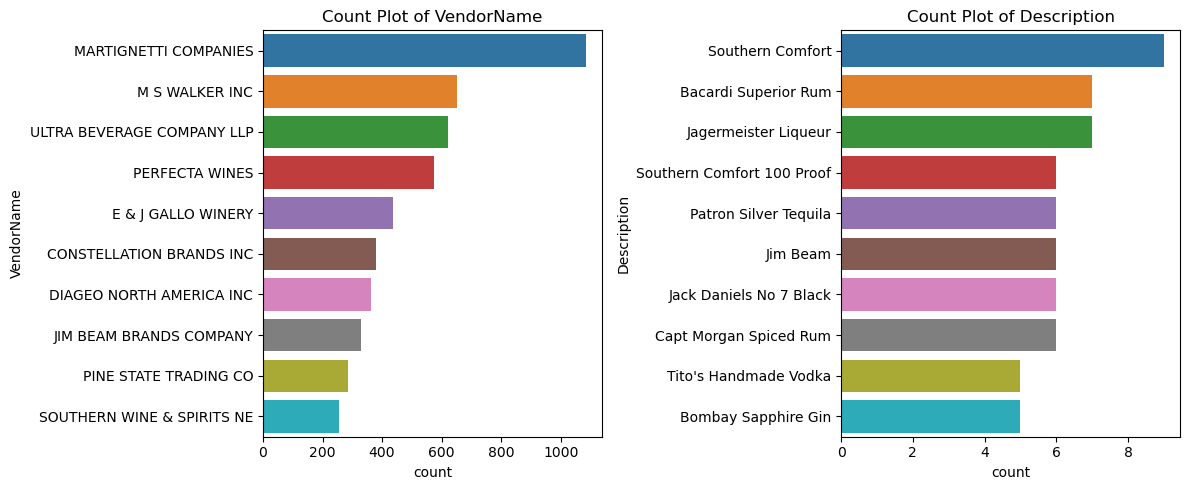

In [ ]:
# Count Plot for Categorical Features
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top-10 categories
    plt.title('Count Plot of {}'.format(col))
    
plt.tight_layout()
plt.show()

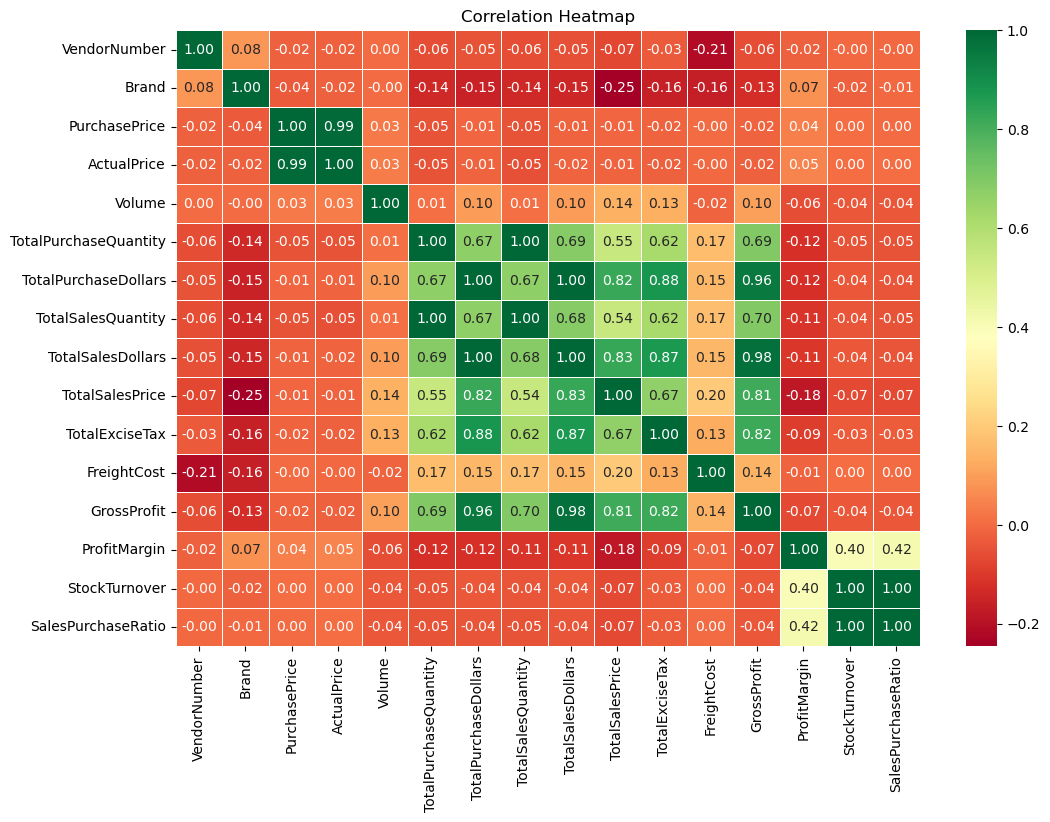

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='0.2f', cmap='RdYlGn', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Correlation Insights

- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggest that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity ans total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decreases, possibly due to competative pricing pressure.
- Stock turnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

## Data Analysis

### 1. Which brands have low sales but high profit margins, and may need promotional or pricing adjustments?

In [10]:
brand_performance = df.groupby('Description' ).agg({'TotalSalesDollars': 'sum', 'ProfitMargin': 'mean'}). reset_index()

In [11]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [12]:
low_sales_threshold

560.299

In [13]:
high_margin_threshold

64.97017552750111

In [14]:
# Filter brands with low sales but high profit margin s
target_brands = brand_performance[(brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
                                  (brand_performance['ProfitMargin'] >= high_margin_threshold)]

print('Brands with Low Sales but High Profit Margins: ')
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins: 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [15]:
# For better visualization
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000] 

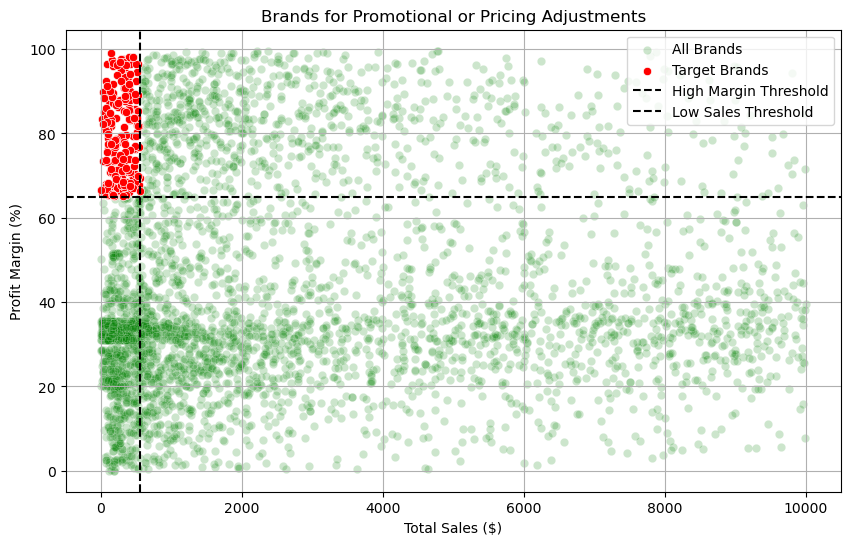

In [16]:
# visualization
plt.figure(figsize=(10,6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='green', label='All Brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')

plt.legend()
plt.grid(True)

plt.show()

### 2. Which suppliers and brands show the highest sales performance?

In [17]:
# Top Suppliers and Brands by Sales Performance
top_suppliers = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [18]:
def currency_formatting(value):
    if value >= 1_000_000:
        return '{:.2f}M'.format(value / 1_000_000)
    elif value >= 1_000:
        return '{:.2f}K'.format(value / 1_000)
    else:
        return '{}'.format(value)

In [19]:
top_suppliers.apply(lambda x: currency_formatting(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [20]:
top_brands.apply(lambda x: currency_formatting(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

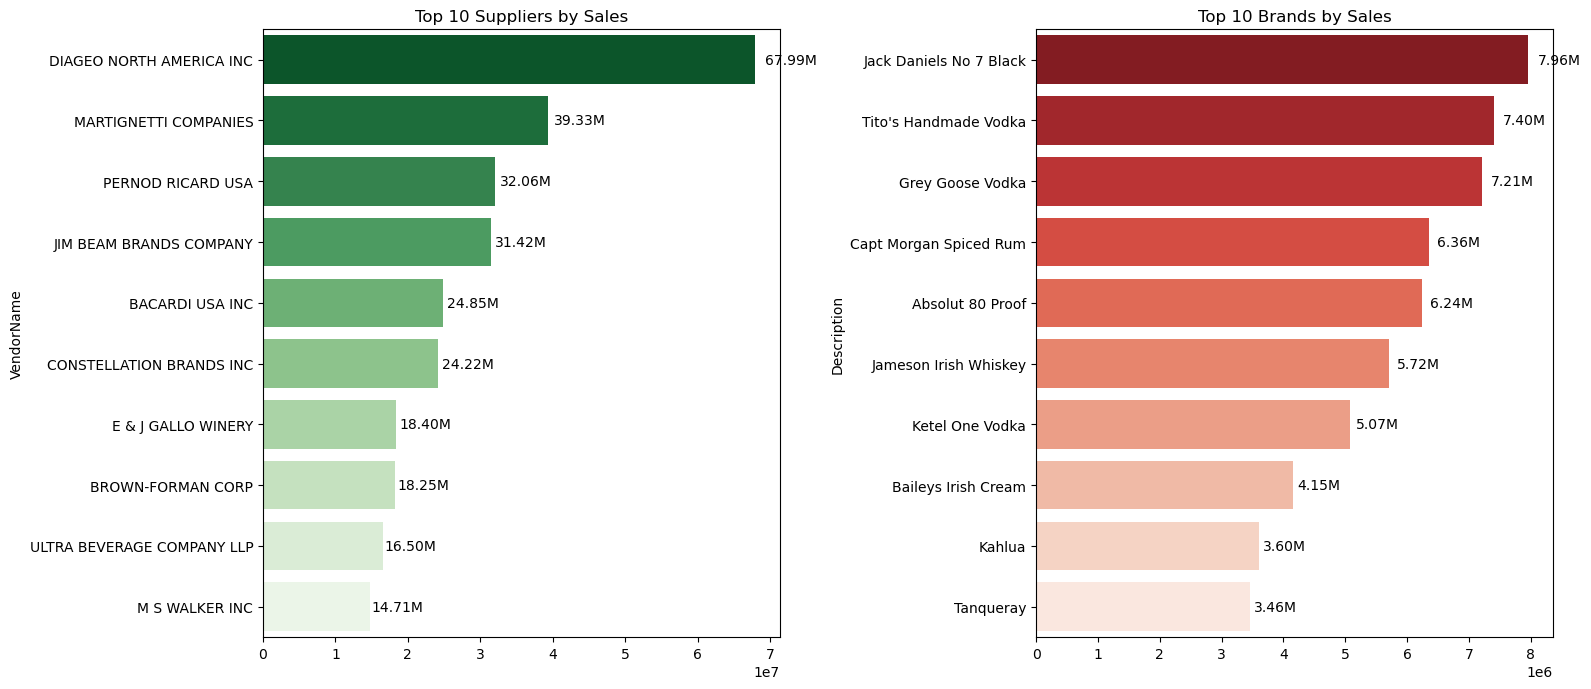

In [22]:
plt.figure(figsize=(16,7))

# Plot for top suppliers
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Greens_r')
plt.title('Top 10 Suppliers by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             currency_formatting(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
    
# Plot for top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=top_brands.values, y=top_brands.index, palette='Reds_r')
plt.title('Top 10 Brands by Sales')

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             currency_formatting(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
    
plt.tight_layout()
plt.show()

### 3. Which suppliers contribute the most to total purchase value?

In [37]:
supplier_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [35]:
supplier_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'}).reset_index()

In [36]:
supplier_performance['PurchaseContribution%'] = (supplier_performance['TotalPurchaseDollars'] / supplier_performance['TotalPurchaseDollars'].sum())*100
supplier_performance = round(supplier_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [38]:
# Display top-10 suppliers
top_suppliers = supplier_performance.head(10)
top_suppliers['TotalPurchaseDollars'] = top_suppliers['TotalPurchaseDollars'].apply(lambda x: currency_formatting(x))
top_suppliers['GrossProfit'] = top_suppliers['GrossProfit'].apply(lambda x: currency_formatting(x))
top_suppliers['TotalSalesDollars'] = top_suppliers['TotalSalesDollars'].apply(lambda x: currency_formatting(x))

In [39]:
top_suppliers['Cumulative Contribution %'] = (top_suppliers['PurchaseContribution%'].cumsum())
top_suppliers

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative Contribution %
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


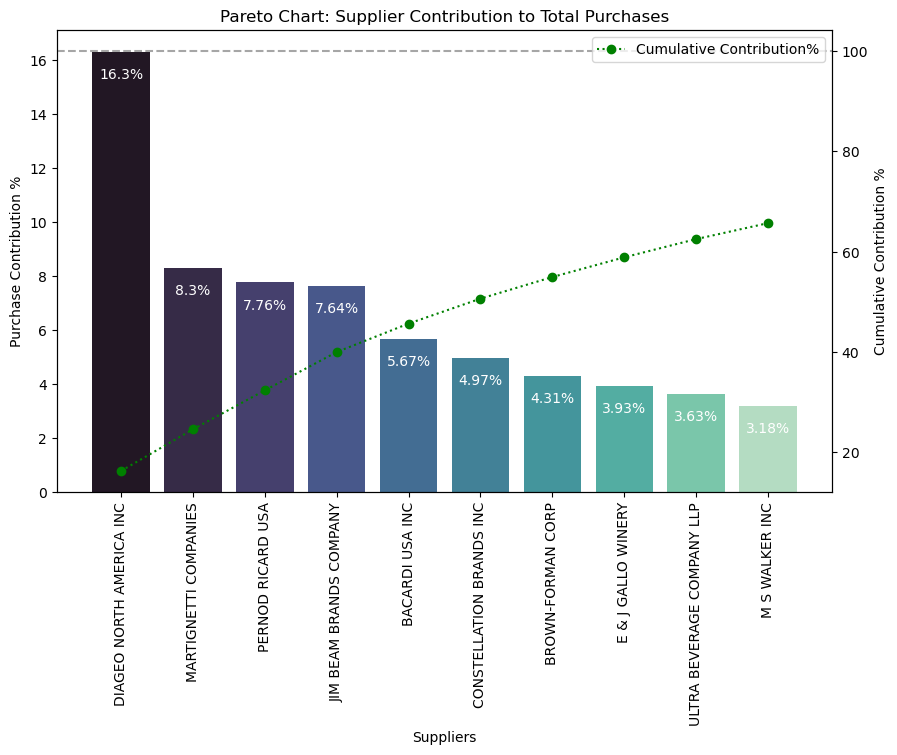

In [42]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_suppliers['VendorName'], y=top_suppliers['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_suppliers['PurchaseContribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')
    
# Line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_suppliers['VendorName'], top_suppliers['Cumulative Contribution %'], color='green', marker='o', linestyle='dotted', label='Cumulative Contribution%')

ax1.set_xticklabels(top_suppliers['VendorName'], rotation=90)
ax1.set_xlabel('Suppliers')
ax1.set_ylabel('Purchase Contribution %', color='black')
ax1.set_title('Pareto Chart: Supplier Contribution to Total Purchases')
ax2.set_ylabel('Cumulative Contribution %', color='black')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

### 4. How much of total procurement is dependent on top supplier ?

In [43]:
top_10_purchase_contri = round(top_suppliers['PurchaseContribution%'].sum(), 2)
print('Total Purchase Contribution of Top-10 Suppliers: {}%'.format(top_10_purchase_contri))

Total Purchase Contribution of Top-10 Suppliers: 65.69%


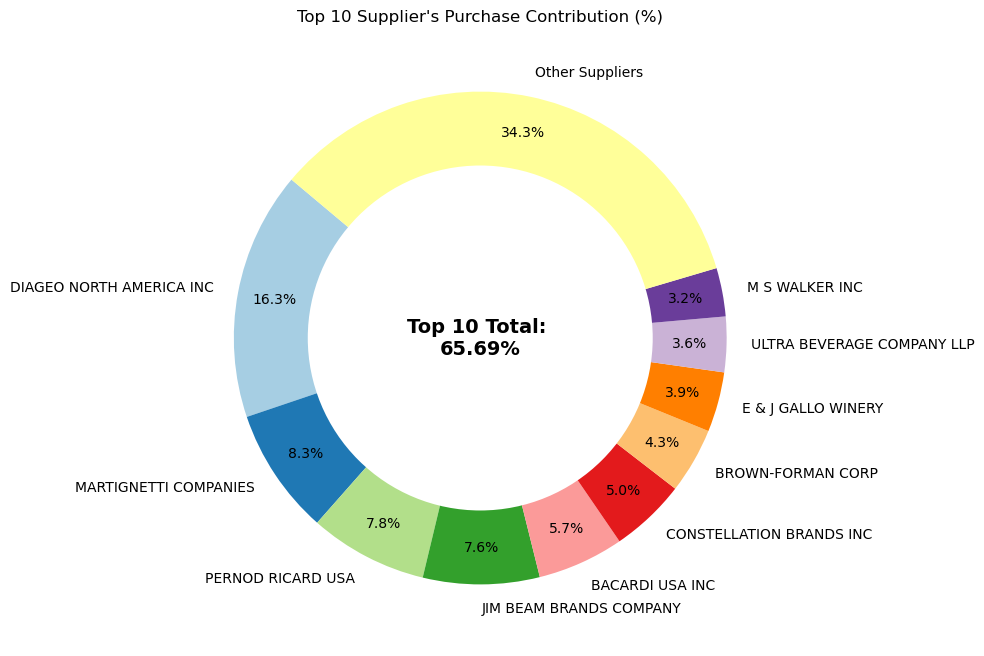

In [48]:
suppliers = list(top_suppliers['VendorName'].values)
purchase_contributions = list(top_suppliers['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100-total_contribution

# Append "Other suppliers" category
suppliers.append('Other Suppliers')
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=suppliers, autopct='%1.1f%%', startangle=140,
                                 pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white cirle in the center to create a "donut" effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the centre
plt.text(0, 0, 'Top 10 Total: \n{}%'.format(round(total_contribution,2)), fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Supplier's Purchase Contribution (%)")
plt.show()

### 5. Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [49]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


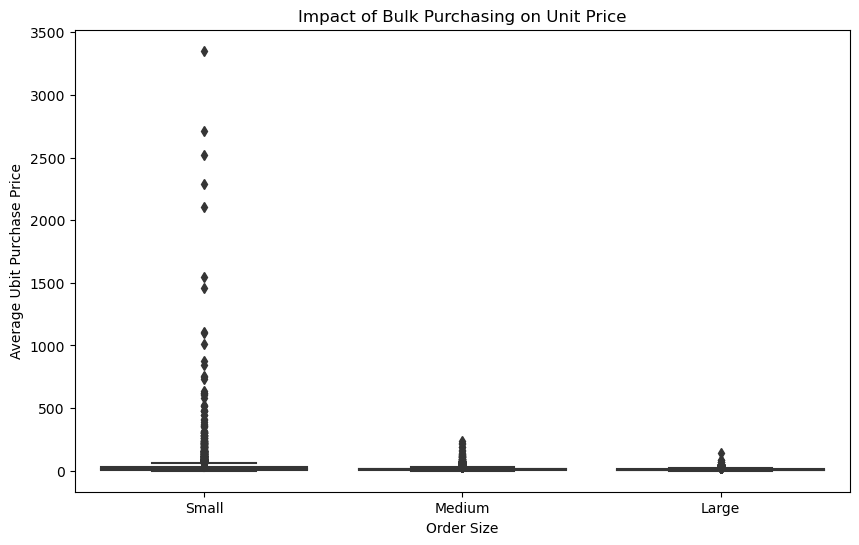

In [50]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette='viridis')
plt.xlabel('Order Size')
plt.ylabel('Average Ubit Purchase Price')

plt.title('Impact of Bulk Purchasing on Unit Price')
plt.show()

- Suppliers placing large orders get the lowest unit price ($10.78 per unit), which allows for higher profit margins—if inventory is managed efficiently.

- There is a significant price gap between small and large orders, with a 72% reduction in unit cost for bulk purchases.

- This shows that the bulk pricing strategy is effective—it motivates suppliers to order in larger volumes, boosting total sales even though the revenue per unit is lower.

### 6. Which suppliers have low inventory turnover, indicating excess stock and slow-moving products?

In [51]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### 7. What is the value of unsold inventory held by each supplier, and who are the largest contributors to this locked capital?

In [52]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', currency_formatting(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [53]:
# Aggregate Capital Locked per Suppliers
inventory_value_per_supplier = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Suppliers with the highest locked capital
inventory_value_per_supplier = inventory_value_per_supplier.sort_values(by='UnsoldInventoryValue', ascending=False)
inventory_value_per_supplier['UnsoldInventoryValue'] = inventory_value_per_supplier['UnsoldInventoryValue'].apply(currency_formatting)
inventory_value_per_supplier.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### 8. Is there a significant difference in profit margins between top-performing and low-performing suppliers ?

#### Hypothesis:

$H_0$ (Null Hypothesis): No significant difference in the mean profit margins. <br>
<br>
$H_a$ (Alternate Hypothesis): Significant difference in the mean profit margins

In [58]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_suppliers = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
bottom_suppliers = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Perform 2-sample t-test
t_stat, p_value = ttest_ind(top_suppliers, bottom_suppliers, equal_var=False)

# Print results
print('T-Statistics: {}, P-Value {}'.format(round(t_stat, 2), round(p_value, 2)))

if p_value < 0.05:
    print('\nReject H₀: There is a significant difference in profit margins between top-performing & low-performing suppliers')
else:
    print('\nFail to Reject H₀: No significant difference in profit margins.')

T-Statistics: -17.64, P-Value 0.0

Reject H₀: There is a significant difference in profit margins between top-performing & low-performing suppliers


In [59]:
df.to_csv('summary_data.csv', index=False)